In [ ]:
import logging
import pandas as pd
from utilsforecast.plotting import plot_series
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

Seed set to 1
Seed set to 1


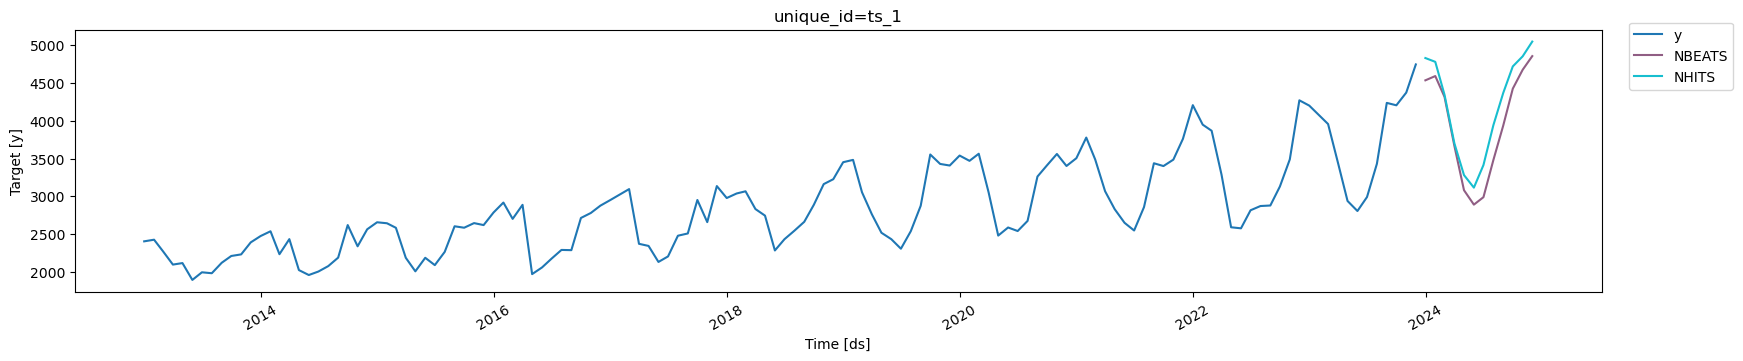

In [9]:
# Cargar y transformar los datos
df2 = pd.read_excel('demanda2.xlsx')

meses_es_en = {
    'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April',
    'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August',
    'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'
}

df_melted = df2.melt(id_vars=['Año'], var_name='Mes', value_name='y')
df_melted['Mes'] = df_melted['Mes'].map(meses_es_en)
df_melted['ds'] = pd.to_datetime(df_melted['Año'].astype(str) + '-' + df_melted['Mes'], format='%Y-%B')
df_final = df_melted[['ds', 'y']].sort_values('ds').reset_index(drop=True)

# Agregar columna de identificador único para la serie
df_final['unique_id'] = 'ts_1'

# Dividir datos en entrenamiento y prueba (últimas 12 entradas para prueba)
train_df = df_final.iloc[:-12]
test_df = df_final.iloc[-12:]

horizonte = len(test_df)

# Configurar y ajustar modelos NBEATS y NHITS
modelos = [
    NBEATS(input_size=2 * horizonte, h=horizonte, max_steps=100, enable_progress_bar=False),
    NHITS(input_size=2 * horizonte, h=horizonte, max_steps=100, enable_progress_bar=False)
]
nf = NeuralForecast(models=modelos, freq='ME')
nf.fit(df=train_df)
pronostico_df = nf.predict()

# Graficar la serie de entrenamiento y los pronósticos
plot_series(train_df, pronostico_df)


Seed set to 1
Seed set to 1


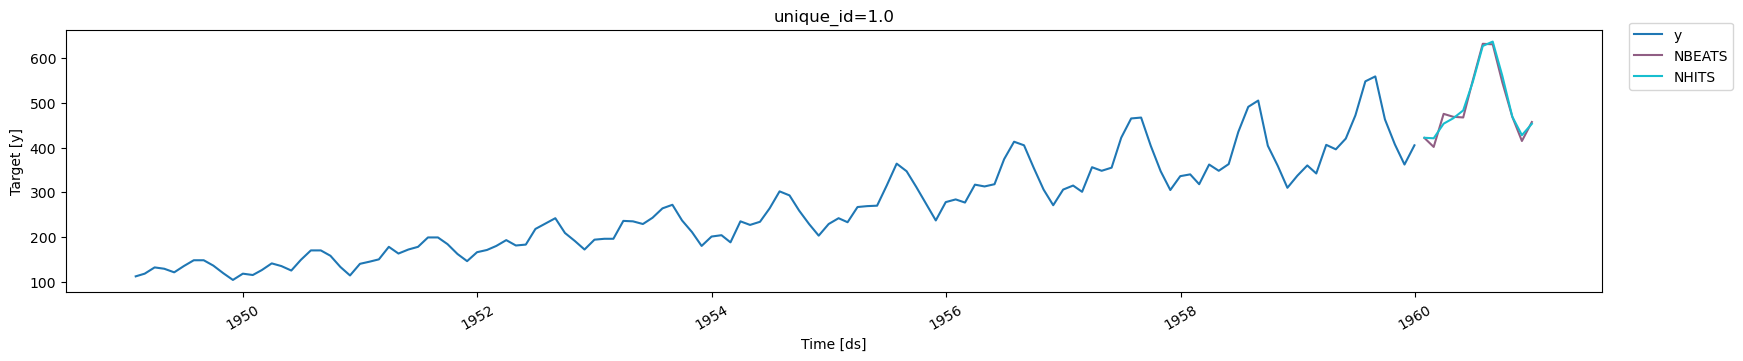

In [3]:
# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False)]
nf = NeuralForecast(models=models, freq='ME')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict()

# Plot predictions
plot_series(Y_train_df, Y_hat_df)